# Evaluation

In [12]:
import pickle
import matplotlib.pyplot as plt

In [2]:
with open('../data/processed/scores','rb') as f:
    scores = pickle.load(f)

[([0.9987584948539734, 0.998842179775238],
  [0.9987584948539734, 0.998842179775238],
  [0.9996563196182251, 0.9998112916946411],
  [0.9996563196182251, 0.9998112916946411],
  18.401255280089874,
  55.203765840269625),
 ([0.9988016486167908,
   0.9988961219787598,
   0.999066174030304,
   0.9990257024765015],
  [0.9988016486167908,
   0.9988961219787598,
   0.999066174030304,
   0.9990257024765015],
  [0.999305009841919,
   0.9993692636489868,
   0.9994056224822998,
   0.9995131492614746],
  [0.999305009841919,
   0.9993692636489868,
   0.9994056224822998,
   0.9995131492614746],
  17.7753065997269,
  88.8765329986345),
 ([0.998558759689331, 0.9988016486167908],
  [0.998558759689331, 0.9988016486167908],
  [0.9995574355125427, 0.9996131062507629],
  [0.9995574355125427, 0.9996131062507629],
  18.494722090661526,
  55.48416627198458),
 ([0.9985695481300354, 0.9989393353462219, 0.9990742802619934],
  [0.9985695481300354, 0.9989393353462219, 0.9990742802619934],
  [0.9997022151947021, 0.9

In [4]:
test_acc=[]
train_acc=[]
test_auc=[]
train_auc=[]
avg=[]
total=[]
for i in range(len(scores)):
    (test_score_acc, train_score_acc, test_score_auc, train_score_auc, avg_time, total_time) = scores[i]
    test_acc.append(test_score_acc)
    train_acc.append(train_score_acc)
    test_auc.append(test_score_auc)
    train_auc.append(train_score_auc)
    avg.append(avg_time)
    total.append(total_time)

In [9]:
for i in range(len(test_auc)):
    print(max(test_auc[i]))

0.9998112916946411
0.9995131492614746
0.9996131062507629
0.999872088432312
0.9996545910835266
0.9996476769447327
0.9998118877410889
0.999739944934845
0.9997137784957886
0.9988529086112976
0.9994931817054749
0.9996169805526733


In [10]:
for i in range(len(test_acc)):
    print(max(test_acc[i]))

0.998842179775238
0.999066174030304
0.9988016486167908
0.9990742802619934
0.9985911250114441
0.9988097548484802
0.9990068078041077
0.9989258050918579
0.9987558126449585
0.9983509182929993
0.9988313317298889
0.9987314939498901


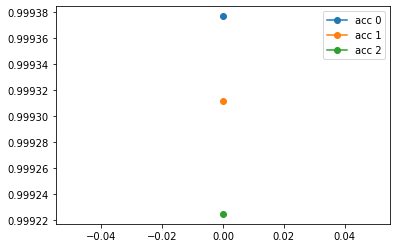

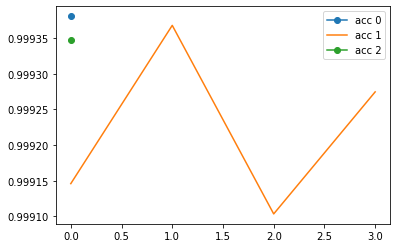

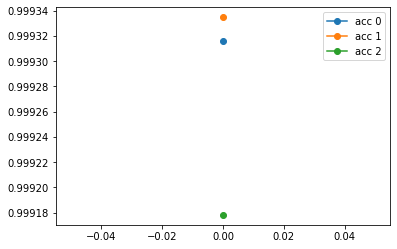

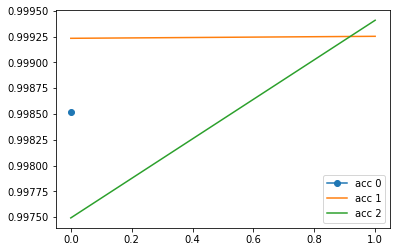

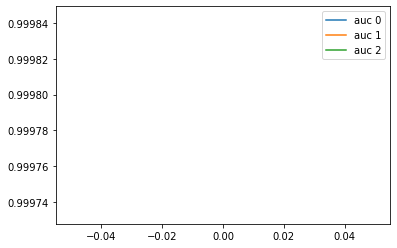

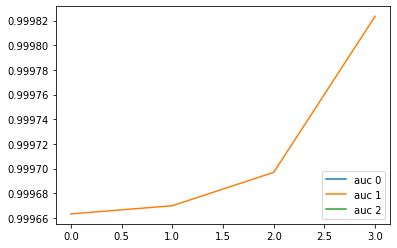

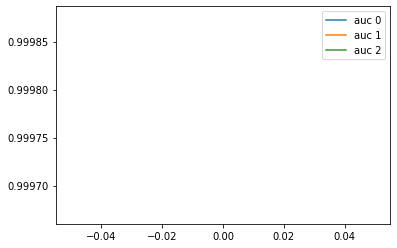

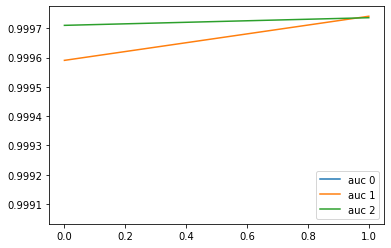

In [33]:
for i in range(4):
    for j in range(3):
        k=(i*3)+j
        if (len(test_acc[k]) > 1):
            plt.plot(range(len(test_acc[k])),test_acc[k],label='acc ' + str(j))
        else:
            plt.plot(0,test_acc[k], marker='o',label='acc ' + str(j))
    plt.legend()
    plt.show()
for i in range(4):
    for j in range(3):
        k=(i*3)+j
        if (len(test_auc[k]) > 1):
            plt.plot(range(len(test_auc[k])),test_auc[k],label='auc ' + str(j))
        else:
            plt.plot(0,test_auc[k], marker='o',label='auc ' + str(j))
    plt.legend()
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

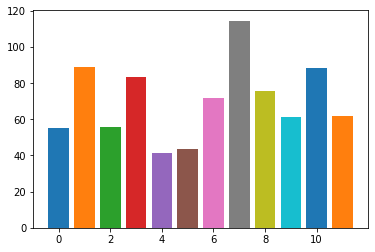

In [27]:
for i in range(12):
    plt.bar(i, total[i], label=str(i))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

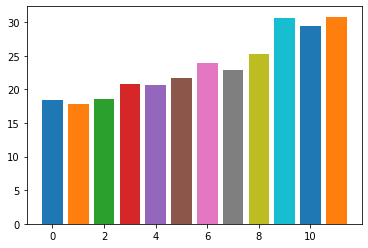

In [28]:
for i in range(12):
    plt.bar(i, avg[i], label=str(i))
plt.show

Here we can see that the scores are so close that we can not gain enough data from this. We will look at the full data set and if that doesn't work then we will look at the 4 different categories instead of malicious or not.

In [35]:
with open('../data/processed/scores1','rb') as f:
    scores = pickle.load(f)
test_acc1=[]
train_acc1=[]
test_auc1=[]
train_auc1=[]
avg1=[]
total1=[]
for i in range(len(scores)):
    (test_score_acc, train_score_acc, test_score_auc, train_score_auc, avg_time, total_time) = scores[i]
    test_acc1.append(test_score_acc)
    train_acc1.append(train_score_acc)
    test_auc1.append(test_score_auc)
    train_auc1.append(train_score_auc)
    avg1.append(avg_time)
    total1.append(total_time)


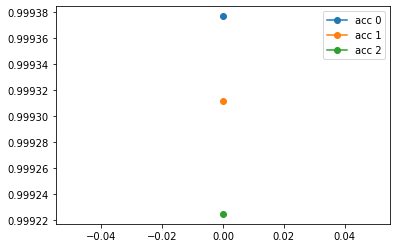

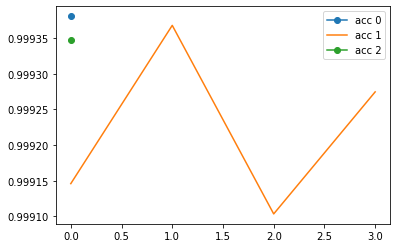

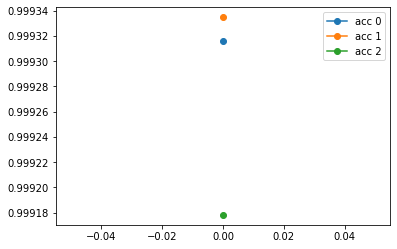

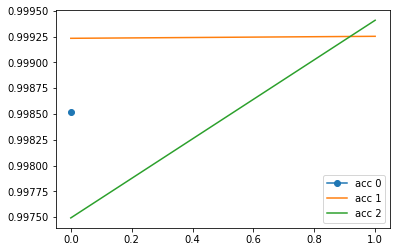

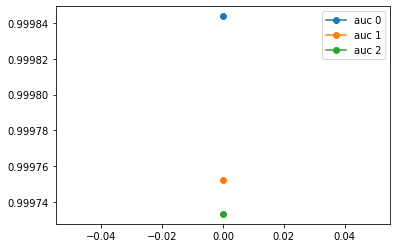

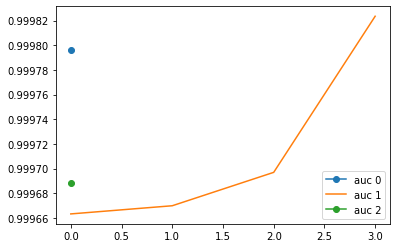

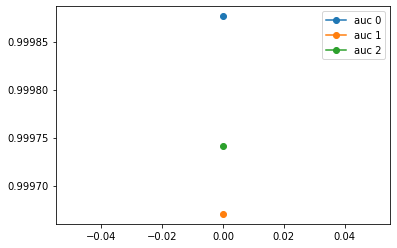

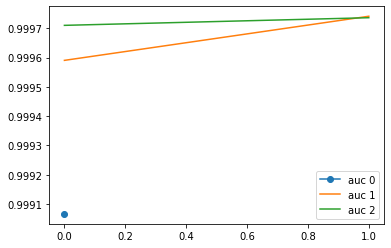

In [37]:
for i in range(4):
    for j in range(3):
        k=(i*3)+j
        if (len(test_acc1[k]) > 1):
            plt.plot(range(len(test_acc1[k])),test_acc1[k],label='acc ' + str(j))
        else:
            plt.plot(0,test_acc1[k], marker='o',label='acc ' + str(j))
    plt.legend()
    plt.show()
for i in range(4):
    for j in range(3):
        k=(i*3)+j
        if (len(test_auc1[k]) > 1):
            plt.plot(range(len(test_auc1[k])),test_auc1[k],label='auc ' + str(j))
        else:
            plt.plot(0,test_auc1[k], marker='o',label='auc ' + str(j))
    plt.legend()
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

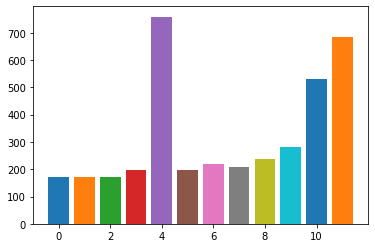

In [38]:
for i in range(12):
    plt.bar(i, total1[i], label=str(i))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

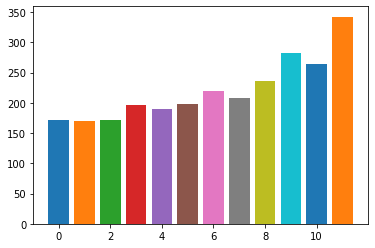

In [39]:
for i in range(12):
    plt.bar(i, avg1[i], label=str(i))
plt.show

In [ ]:
with open('../data/processed/scores2','rb') as f:
    scores = pickle.load(f)
test_acc=[]
train_acc=[]
test_auc=[]
train_auc=[]
avg=[]
total=[]
for i in range(len(scores)):
    (test_score_acc, train_score_acc, test_score_auc, train_score_auc, avg_time, total_time) = scores[i]
    test_acc.append(test_score_acc)
    train_acc.append(train_score_acc)
    test_auc.append(test_score_auc)
    train_auc.append(train_score_auc)
    avg.append(avg_time)
    total.append(total_time)

In [ ]:
for i in range(4):
    for j in range(3):
        k=(i*3)+j
        plt.plot(range(len(test_acc[k])),test_acc[k],label='acc ' + str(j))
    plt.legend()
    plt.show()
for i in range(4):
    for j in range(3):
        k=(i*3)+j
        plt.plot(range(len(test_auc[k])),test_auc[k],label='auc ' + str(j))
    plt.legend()
    plt.show()